### Notebook for Data preprocessing tasks

##### Importing Required dependencies

In [10]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudip.pokhrel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Importing the dataset

In [12]:
# importing data into pandas df for preprocessing
twitter_df = pd.read_csv('../dataset/training.1600000.processed.noemoticon.csv', encoding='iSO-8859-1')

In [13]:
# Checking the Shape
twitter_df.shape

(1599999, 6)

In [14]:
# first 5 rows of the dataframe
twitter_df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [15]:
twitter_df['0'].unique()

array([0, 4])

##### Data is missing Header so we Import again with headers

In [16]:
column_names = ['target', 'id','date','flag','user','text']
tw_df = pd.read_csv('../dataset/training.1600000.processed.noemoticon.csv',names= column_names, encoding='iSO-8859-1')

In [17]:
tw_df.shape

(1600000, 6)

In [18]:
# printning first 4 rows of the dataframe
tw_df.head(4)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


In [19]:
# counting missing values in dataset
tw_df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [20]:
# checking the distribution of target column
tw_df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

It Shows that there are half positive(target value 4) and half negative sentiment(target value 0) in our dataset




> **Now, We convert 
 the target from "4" to "1"**



>  **0 --> Negative Tweet**


>  **1 --> Positive Tweet**


In [21]:
tw_df.replace({'target':{4:1}}, inplace =True)

In [22]:
# Veryfying the Unique words in the Target Column
tw_df['target'].unique()

array([0, 1])

##### Now, We drop COlumns that will not have impact on result

In [23]:
# Specify the columns to drop
columns_to_drop = ["id", "date", "flag", "user"]  # These column will have no impact on sentiment

# Drop the columns
df = tw_df.drop(columns=columns_to_drop)

# Display the first few rows of the updated DataFrame
print(df.head())


   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....


In [24]:
df['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

##### Remove all special and numeric character from data

In [25]:

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r"@\w+", '', text) # Remove mentions (@username)
    text = re.sub(r"#", '', text)  # Remove hashtags (only # symbol, keep the text)
    text = re.sub(r"[^\w\s']", '', text) # Remove punctuation
    text = re.sub(r"\d+", '', text) # Remove numbers
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters (e.g., emojis)
    text = re.sub(r"\s+", ' ', text).strip() # Remove extra whitespace
    
    return text


In [ ]:
# Apply cleaning to your dataset
df['text'] = df['text'].apply(clean_text)
# Convert the 'Text' column to lowercase
df['text'] = df['text'].str.lower()


In [28]:
df['text'][0]

"a that's a bummer you shoulda got david carr of third day to do it d"

#### Removing the Stopwords

In [29]:
# Load the stopwords list
stop_words = set(stopwords.words('english'))

# Exclude critical stopwords (negation words and others important for sentiment)
important_words = {
    "against", "although", "because", "but", "can't", "couldn't", "despite", "doesn't", "don't", 
    "enough", "however", "isn't", "just", "never", "no", "nor", "not", "only", "quite", 
    "shouldn't", "so", "though", "too", "very", "wasn't", "won't", "wouldn't", "yet","isn't", "aren't", "wasn't", "weren't", "haven't", "hasn't", "hadn't",
    "don't", "doesn't", "didn't", "won't", "wouldn't", "shan't", "shouldn't",
    "can't", "couldn't", "mustn't", "mightn't", "needn't"
}

# Subtract important words from stopwords
custom_stop_words = stop_words - important_words

In [30]:
# Function to remove stopwords
def remove_stopwords(text):
    # Tokenize the text and filter out stopwords
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in custom_stop_words]
    return " ".join(filtered_words)

In [31]:
from joblib import Parallel, delayed

df['text'] = Parallel(n_jobs=-1)(delayed(remove_stopwords)(text) for text in df['text'])


In [32]:
df.head()

,target,text
0,0,that's bummer shoulda got david carr third day
1,0,upset can't update facebook texting might cry ...
2,0,dived many times ball managed save rest go bounds
3,0,whole body feels itchy like fire
4,0,no not behaving i'm mad because can't see


# Visualize the Data


C:\Users\sudip.pokhrel\AppData\Local\Temp\ipykernel_18892\3799105552.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


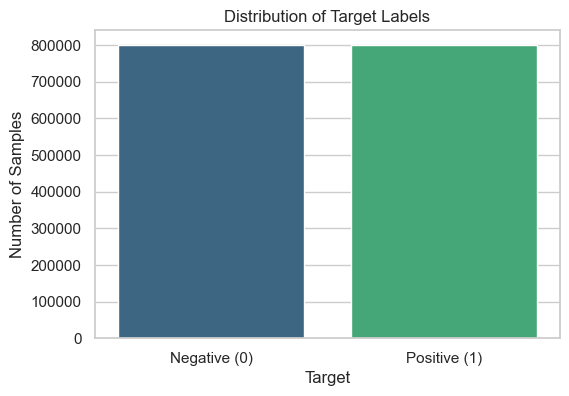

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Count the number of samples for each target label
label_counts = df['target'].value_counts()

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Target Labels')
plt.xlabel('Target')
plt.ylabel('Number of Samples')
plt.xticks([0,1], ['Negative (0)', 'Positive (1)'])
plt.show()


### Wordcloud of Positive sentiment

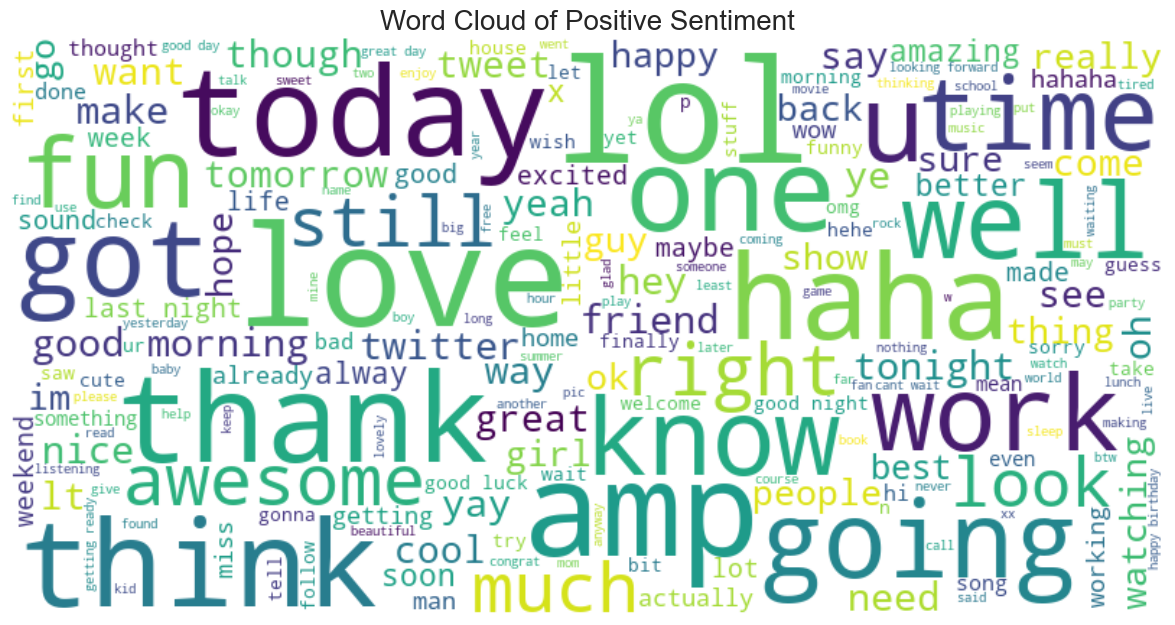

In [35]:


from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter the dataset for positive sentiments
positive_text = ' '.join(df[df['target'] == 1]['text'])

# Define additional stopwords if necessary
additional_stopwords = set([
    # Add any additional stopwords you want to exclude
])

# Combine with existing stopwords
stopwords = STOPWORDS.union(additional_stopwords)

# Generate the word cloud for positive sentiments
wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=100,
    random_state=42
).generate(positive_text)

# Display the generated word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment', fontsize=20)
plt.show()


### Wordcloud of negative sentiment

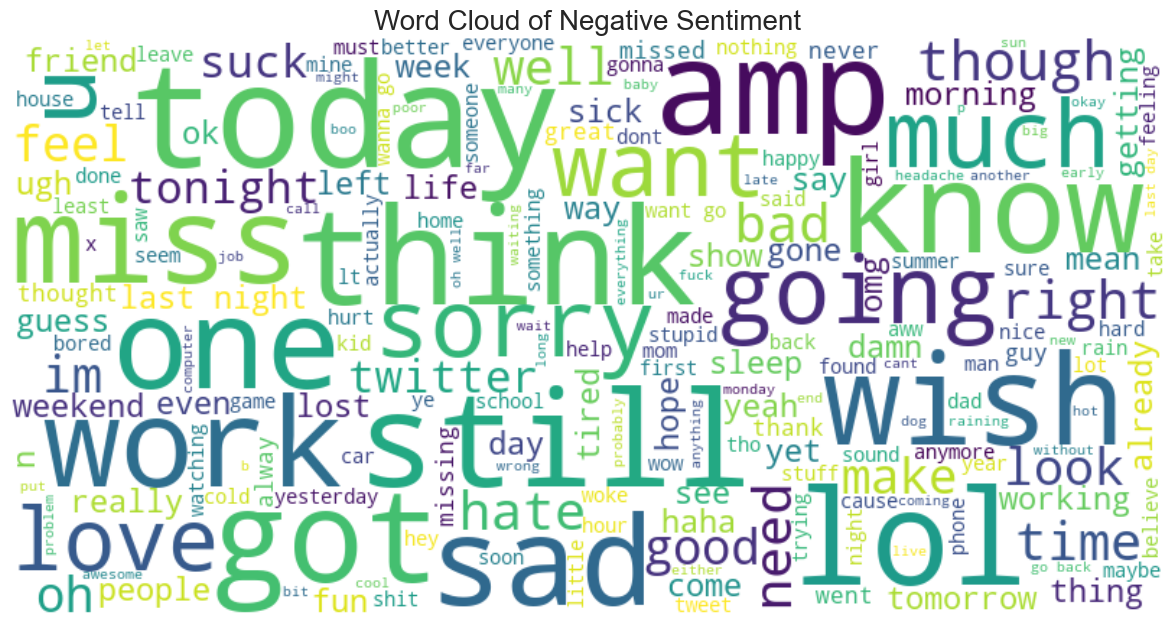

In [36]:


from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter the dataset for negative sentiments
negative_text = ' '.join(df[df['target'] == 0]['text'])

# Define additional stopwords if necessary
additional_stopwords = set([
    # Add any additional stopwords you want to exclude
])

# Combine with existing stopwords
stopwords = STOPWORDS.union(additional_stopwords)

# Generate the word cloud for negative sentiments
wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=100,
    random_state=42
).generate(negative_text)

# Display the generated word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment', fontsize=20)
plt.show()


#### Stemming
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, and “choco” to the root word “chocolate” 
and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [ ]:
# Initialize the SnowballStemmer for English
stemmer = SnowballStemmer('english')

def stem_text(text):
    
    words = text.split()# Tokenize the text into words using split()
    stemmed_words = [stemmer.stem(word) for word in words]# Apply stemming to each word
    stemmed_text = ' '.join(stemmed_words) # Reconstruct the text from stemmed words
    
    return stemmed_text

In [ ]:
# Apply stemming using Parallel processing
df['text'] = Parallel(n_jobs=-1)(delayed(stem_text)(text) for text in df['text'])

In [ ]:
# separating the data and label
X = df['text'].values
Y = df['target'].values


In [88]:
# separating the data and label
X = df['text'].values
Y = df['target'].values


In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [92]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [93]:
model = LogisticRegression(max_iter=1000)

In [94]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [95]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [98]:
print('Accuracy score on the training data :', training_data_accuracy)

Accuracy score on the training data : 0.79913125


In [ ]:
# accuracy score on the testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)


In [97]:
print('Accuracy score on the testing data :', test_data_accuracy)

Accuracy score on the testing data : 0.787290625


In [99]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [100]:
# Make predictions on the test set
print("Making predictions on the test set...")
y_pred = model.predict(X_test)

Making predictions on the test set...


In [101]:
# Calculate Accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Calculate F1 Score
f1 = f1_score(Y_test, y_pred)

# Calculate Recall
recall = recall_score(Y_test, y_pred)

# Calculate Precision
precision = precision_score(Y_test, y_pred)

# Display the results
print("\n--- Logistic Regression Model Metrics ---")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")



--- Logistic Regression Model Metrics ---
Accuracy : 78.73%
F1 Score : 78.99%
Recall   : 79.96%
Precision: 78.04%


In [102]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC

In [103]:
# Initialize the Multinomial Naïve Bayes model
nb_classifier = MultinomialNB()

# Train the model
print("\nTraining the Multinomial Naïve Bayes model...")
nb_classifier.fit(X_train, Y_train)

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred_nb = nb_classifier.predict(X_test)

# Calculate Evaluation Metrics
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
f1_nb = f1_score(Y_test, y_pred_nb)
recall_nb = recall_score(Y_test, y_pred_nb)
precision_nb = precision_score(Y_test, y_pred_nb)

# Display the results
print("\n--- Multinomial Naïve Bayes Model Metrics ---")
print(f"Accuracy : {accuracy_nb * 100:.2f}%")
print(f"F1 Score : {f1_nb * 100:.2f}%")
print(f"Recall   : {recall_nb * 100:.2f}%")
print(f"Precision: {precision_nb * 100:.2f}%")



Training the Multinomial Naïve Bayes model...
Making predictions on the test set...

--- Multinomial Naïve Bayes Model Metrics ---
Accuracy : 76.34%
F1 Score : 75.78%
Recall   : 74.03%
Precision: 77.62%


In [104]:
# Initialize the Support Vector Machine model with a linear kernel
svm_classifier = LinearSVC(
    C=1.0,                    # Regularization parameter
    max_iter=1000,            # Maximum iterations
    random_state=42,
    dual=False,               # Dual=False is faster for n_samples > n_features
    tol=1e-4                   # Tolerance for stopping criteria
)

# Train the model
print("\nTraining the Support Vector Machine (SVM) model...")
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred_svm = svm_classifier.predict(X_test)

# Calculate Evaluation Metrics
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
f1_svm = f1_score(Y_test, y_pred_svm)
recall_svm = recall_score(Y_test, y_pred_svm)
precision_svm = precision_score(Y_test, y_pred_svm)

# Display the results
print("\n--- Support Vector Machine (SVM) Model Metrics ---")
print(f"Accuracy : {accuracy_svm * 100:.2f}%")
print(f"F1 Score : {f1_svm * 100:.2f}%")
print(f"Recall   : {recall_svm * 100:.2f}%")
print(f"Precision: {precision_svm * 100:.2f}%")



Training the Support Vector Machine (SVM) model...
Making predictions on the test set...

--- Support Vector Machine (SVM) Model Metrics ---
Accuracy : 78.06%
F1 Score : 78.28%
Recall   : 79.09%
Precision: 77.49%


'[image.png]' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

NameError: name 'torch' is not defined